<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install nbformat --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

/bin/bash: mamba: command not found
  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.0
    Uninstalling nbformat-5.9.0:
      Successfully uninstalled nbformat-5.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.8.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period= 'max')
tesla_data.head()


AttributeError: ignored

In [ ]:
tesla=yf.Ticker("TSLA")
Tesla_data=tesla.history(period="max")
tesla_data.head()

AttributeError: ignored

In [ ]:
Tesla= yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [ ]:
Tesla_data = Tesla.history(period="max")

AttributeError: ignored

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [ ]:
Tesla_data.reset_index(inplace=True)
Tesla_data.head()

NameError: ignored

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [60]:
# URL of the webpage
url=" https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue."
# Send a GET request to the URL and save the response as html_data
response = requests.get(url)
html_data = response.text

Parse the html data using `beautiful_soup`.


In [61]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [63]:
tables = soup.find_all("table")

for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue.tail()

,Date,Revenue
51,2010-06-30,28
52,2010-03-31,21
53,2009-12-31,
54,2009-09-30,46
55,2009-06-30,27


Execute the following line to remove the comma and dollar sign from the Revenue column

In [ ]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')

<ipython-input-40-97c3f9564401>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [64]:
# Display the last 5 rows of the tesla_revenue dataframe
tesla_revenue.tail()

,Date,Revenue
51,2010-06-30,28
52,2010-03-31,21
53,2009-12-31,
54,2009-09-30,46
55,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [69]:

GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [70]:
gme_data = GameStop.history(period="max")

gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [68]:
# Reset the index of gme_data dataframe
gme_data.reset_index(inplace=True)
# Display the first five rows of gme_data dataframe
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [77]:
import requests

# URL of the webpage to download
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response
html_data = response.text

Parse the html data using `beautiful_soup`.


In [78]:

soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [84]:
tables = soup.find_all("table")
for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue.head()



,Date,Revenue
0,2023-04-30,1237
1,2023-01-31,2226
2,2022-10-31,1186
3,2022-07-31,1136
4,2022-04-30,1378


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [80]:
# Display the last five rows of the gme_revenue dataframe
gme_revenue.tail()

,Date,Revenue
53,2010-01-31,3524
54,2009-10-31,1835
55,2009-07-31,1739
56,2009-04-30,1981
57,2009-01-31,3492


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [ ]:
fig1=make_graph(Tesla_data, tesla_revenue, 'Tesla')
fig1

NameError: ignored

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


Question 6: Plot GameStop Stock Graph

<ipython-input-25-1c4d5d462a48>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



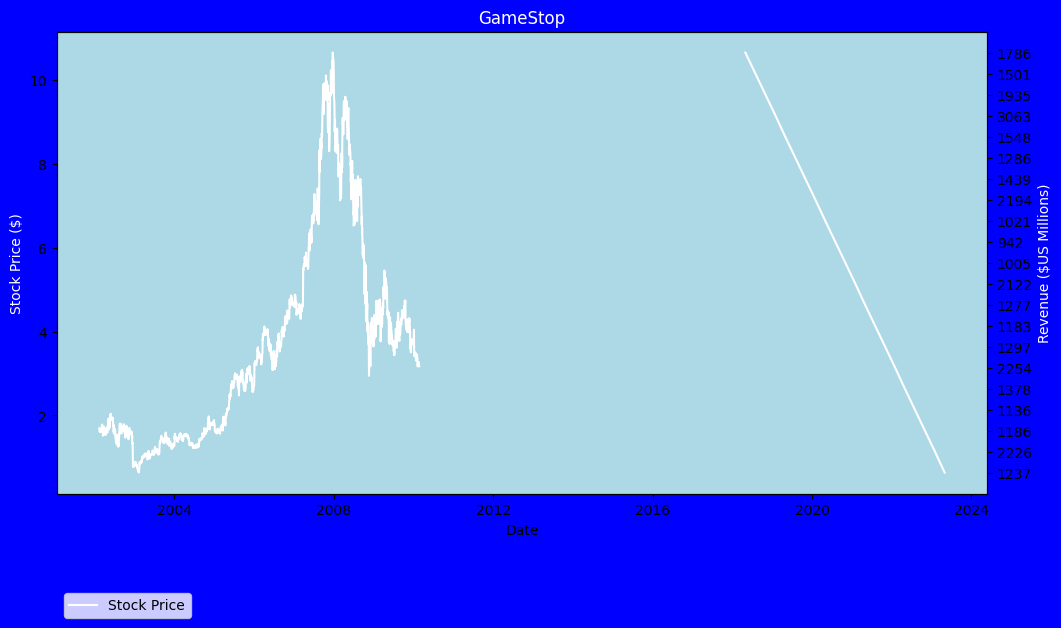

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(gme_data, gme_revenue, title):
    # Filter stock data up to June 2021
    gme_data = gme_data.loc[:'2021-06-30']

    # Filter revenue data up to June 2021
    gme_revenue = gme_revenue.loc[:'2021-06-30']

    # Convert 'Date' column to datetime type
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

    # Create a blue background figure
    fig = plt.figure(figsize=(12, 6), facecolor='blue')

    # Create subplots
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    # Plot stock data
    ax1.plot(gme_data['Date'], gme_data['Close'], color='white', label='Stock Price')
    ax1.set_ylabel('Stock Price ($)', color='white')

    # Plot revenue data
    ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='white', label='Revenue')
    ax2.set_ylabel('Revenue ($US Millions)', color='white')

    # Set common xlabel and title
    ax1.set_xlabel('Date')
    ax1.set_title(title, color='white')

    # Display legend
    ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2), facecolor='white')

    # Rotate x-axis tick labels for better readability
    plt.xticks(rotation=45, color='white')

    # Set background color
    ax1.set_facecolor('lightblue')

    # Show the graph
    plt.show()

# Assuming you have the gme_data DataFrame and gme_revenue DataFrame available
make_graph(gme_data, gme_revenue, 'GameStop')


In [ ]:
def make_graph(gme_data, gme_revenue, title):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)

    gme_data_specific = gme_data[gme_data['Date'] <= '2021-06-30']
    revenue_data_specific = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

    fig.add_trace(go.Scatter(x=pd.to_datetime(gme_data_specific['Date'], infer_datetime_format=True),
                             y=gme_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date'], infer_datetime_format=True),
                             y=pd.to_revenue_data_specific['Revenue'].astype("float"), name="Revenue"), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    fig.update_layout(showlegend=False, height=900, title=title, xaxis_rangeslider_visible=True)
    fig.show()

make_graph(gme_data, gme_revenue, 'GameStop')

ValueError: ignored